In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report



In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X=data.drop(columns=['quality'])
y=data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#train decision tree model
data=DecisionTreeClassifier(random_state=42)
data.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#print classification report
y_pred = data.predict(X_test)
print("Decision Tree")
print(classification_report(y_test,y_pred))

Decision Tree
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.18      0.22        11
           5       0.76      0.79      0.77       135
           6       0.74      0.68      0.71       142
           7       0.49      0.67      0.56        27
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.38      0.38      0.38       320
weighted avg       0.70      0.69      0.69       320



In [ ]:
bagging= BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
y_pred=bagging.predict(X_test)
print("Bagging")
print(classification_report(y_test,y_pred))
pasting=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,bootstrap=False,random_state=42)
pasting.fit(X_train,y_train)

Bagging
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.82      0.79       135
           6       0.74      0.74      0.74       142
           7       0.58      0.70      0.63        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.35      0.38      0.36       320
weighted avg       0.70      0.73      0.72       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100, random_state=42)

In [ ]:
bagging_oob= BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
bagging_oob.fit(X_train,y_train)
oob_score=bagging_oob.oob_score
print("out_of_bag_score)")
print("OOB score",oob_score)

out_of_bag_score)
OOB score False


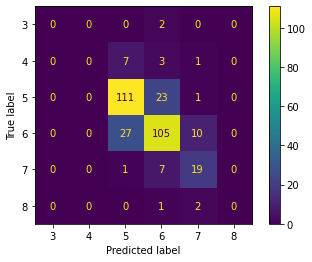

In [ ]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix (bagging,X_test, y_test)
plt.show()